# Evaluation examples

In [196]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
%autoreload 2
# Node names from 0 to 19
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']#, '10', '11', '12', '13', '14', '15', '16', '17', '18','19']
node_names = None
#seed = 12343
simulation = Simulator(n_nodes = 15, n_edges = 20, n_clusters = 3, seed = 123, sample_size = 1000, node_names=node_names)
cluster_dag = simulation.run()

2023-08-23 15:01:55,412 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [198]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X1', 'X14', 'X4', 'X10', 'X13', 'X15', 'X9', 'X5'], 'C2': ['X2', 'X11', 'X12'], 'C3': ['X3', 'X8', 'X6', 'X7']}
[('C1', 'C3'), ('C2', 'C3'), ('C1', 'C2')]


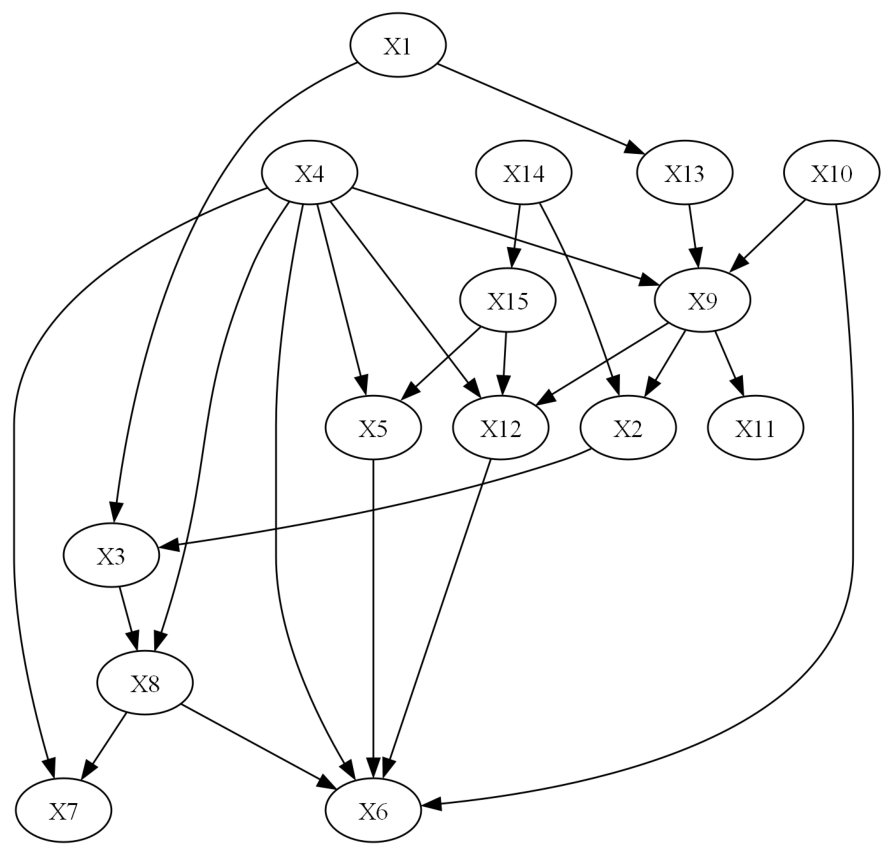

In [199]:
cluster_dag.true_dag.draw_pydot_graph()

In [200]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

In [201]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

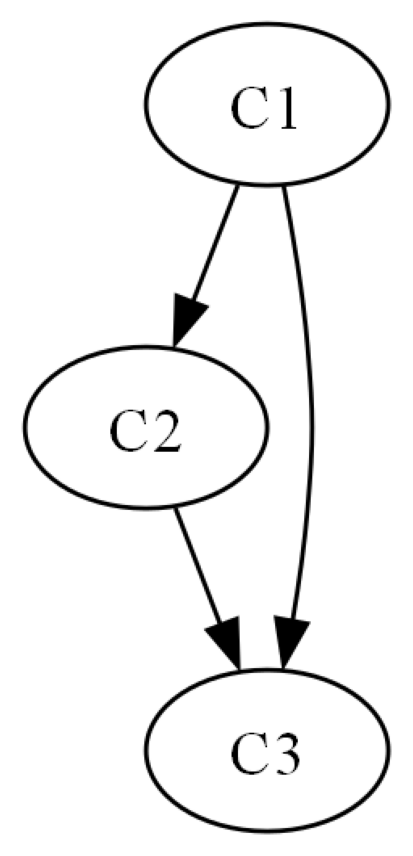

In [202]:
cluster_dag.draw_cluster_graph()

In [203]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.01, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()

C3 phase, Depth=6, working on node 7: 100%|██████████| 4/4 [00:00<00:00, 598.59it/s, duration: 0.15sec]

Duration of algorithm was 0.35sec


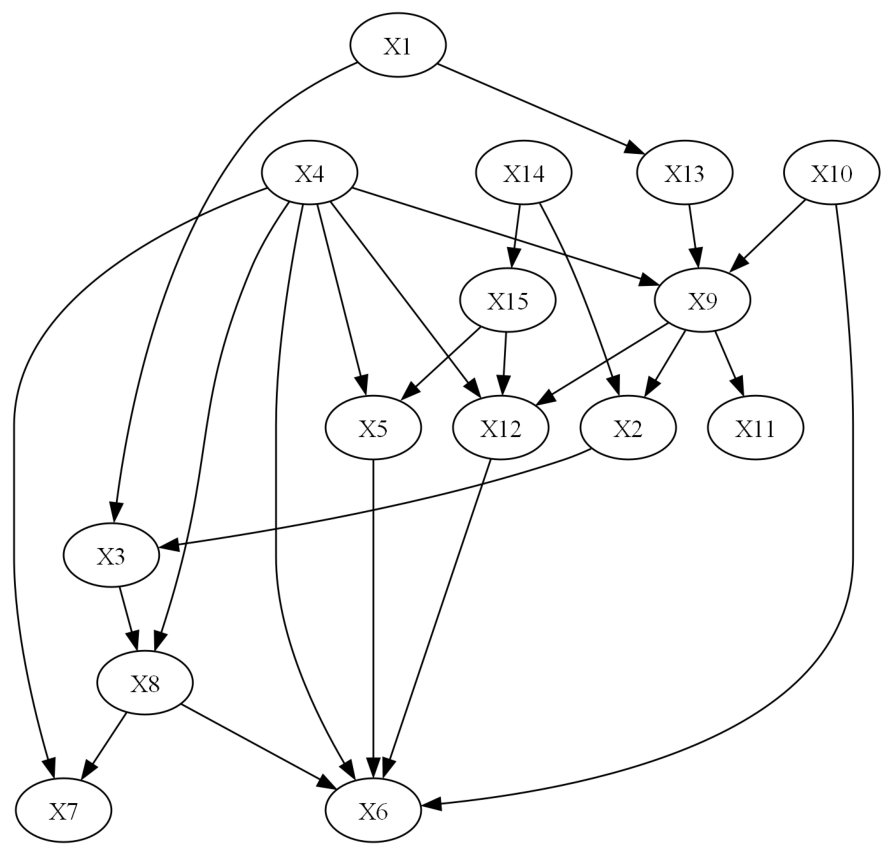

In [204]:
cluster_dag.true_dag.draw_pydot_graph()

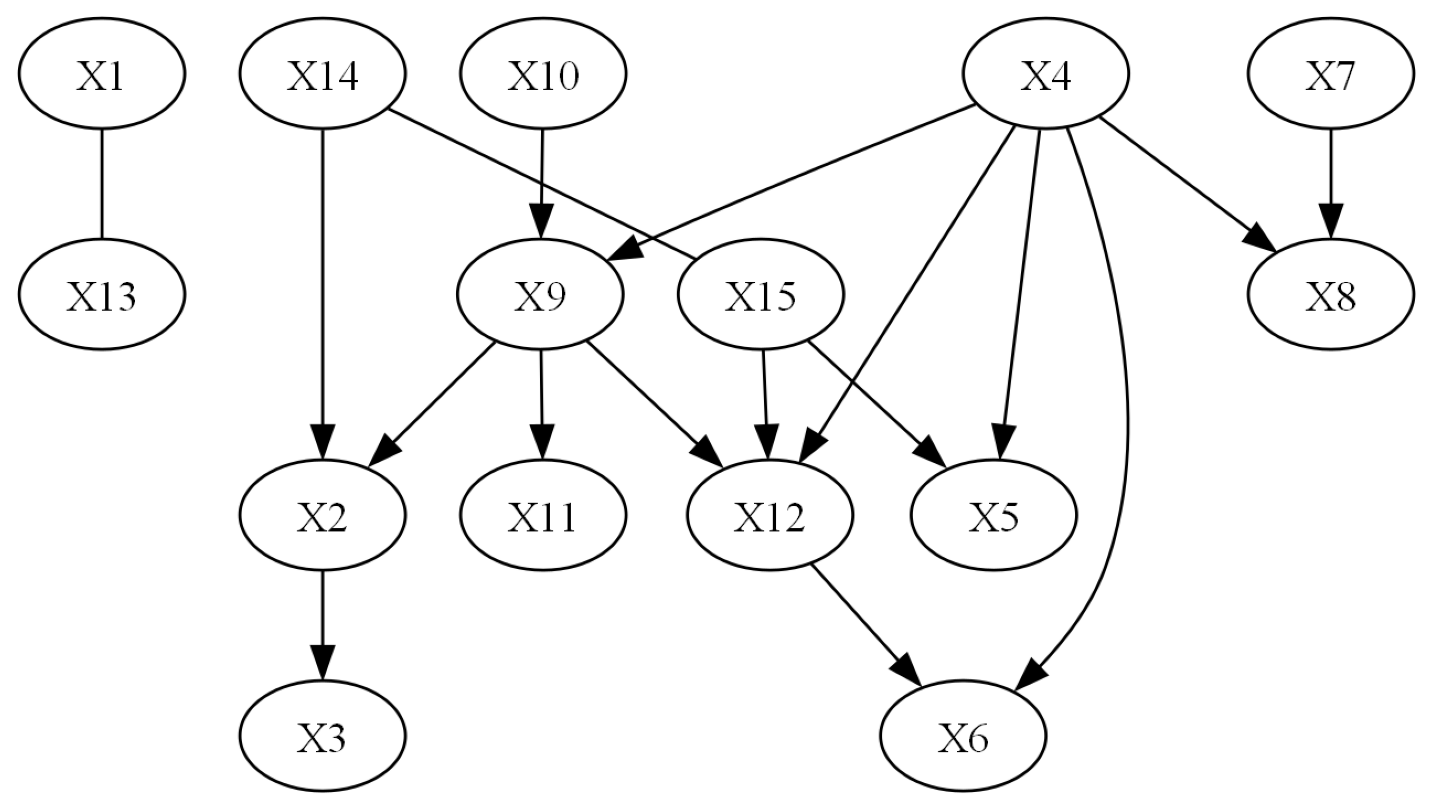

In [205]:
est_graph.draw_pydot_graph()

In [206]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd, sid = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)
print("SID: ", sid)

Adjacency confusion:  {'true_positive': 17, 'false_positive': 0, 'false_negative': 7, 'true_negative': 81, 'precision': 1.0, 'recall': 0.7083333333333334, 'f1_score': 0.8292682926829268}
Arrow confusion:  {'true_positive': 14.0, 'false_positive': 1.0, 'false_negative': 10.0, 'true_negative': 200.0, 'precision': 0.9333333333333333, 'recall': 0.5833333333333334, 'f1_score': 0.7179487179487181, 'true_positive_ce': 14.0, 'false_positive_ce': 1.0, 'false_negative_ce': 3.0, 'true_negative_ce': 207.0, 'precision_ce': 0.9333333333333333, 'recall_ce': 0.8235294117647058, 'f1_score_ce': 0.8749999999999999}
SHD:  8
SID:  {'sid_lower': 58, 'sid_upper': 82}


In [207]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
causallearn_cg = pc(cluster_dag.data, alpha = 0.01, verbose=False, node_names=node_names)

Depth=3, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 789.86it/s]


In [208]:
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd, cl_sid = evaluation_causallearn.get_causallearn_metrics()
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)
print("SID", cl_sid)

Adjacency confusion:  {'true_positive': 15, 'false_positive': 0, 'false_negative': 9, 'true_negative': 81, 'precision': 1.0, 'recall': 0.625, 'f1_score': 0.7692307692307693}
Arrow confusion:  {'true_positive': 3.0, 'false_positive': 5.0, 'false_negative': 21.0, 'true_negative': 196.0, 'precision': 0.375, 'recall': 0.125, 'f1_score': 0.1875, 'true_positive_ce': 3.0, 'false_positive_ce': 5.0, 'false_negative_ce': 12.0, 'true_negative_ce': 205.0, 'precision_ce': 0.375, 'recall_ce': 0.2, 'f1_score_ce': 0.26086956521739135}
SHD:  14
SID {'sid_lower': 124, 'sid_upper': 159}


In [209]:
print(adjacency_confusion == cl_adjacency_confusion)
print(arrow_confusion == cl_arrow_confusion)
print(shd == cl_shd)

False
False
False


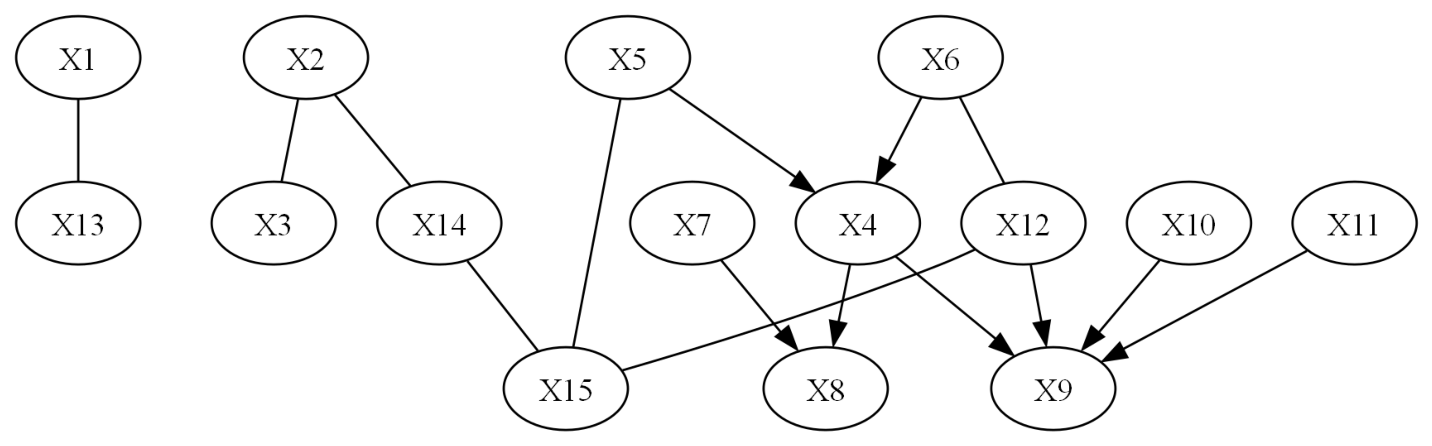

In [210]:
causallearn_cg.draw_pydot_graph()

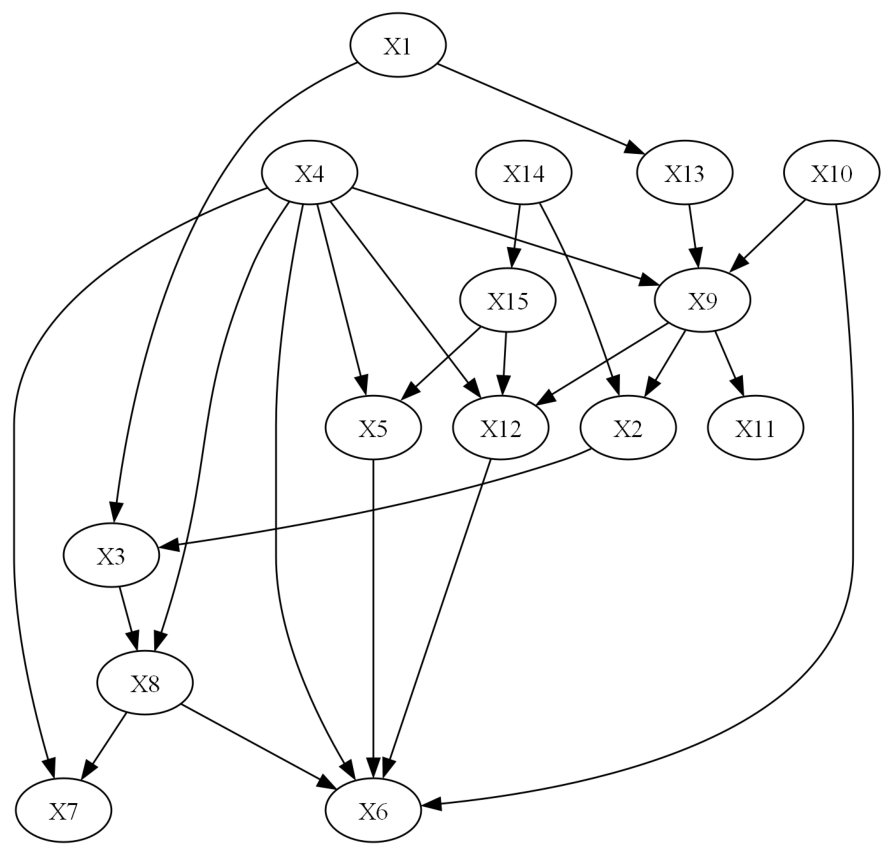

In [211]:
cluster_dag.true_dag.draw_pydot_graph()

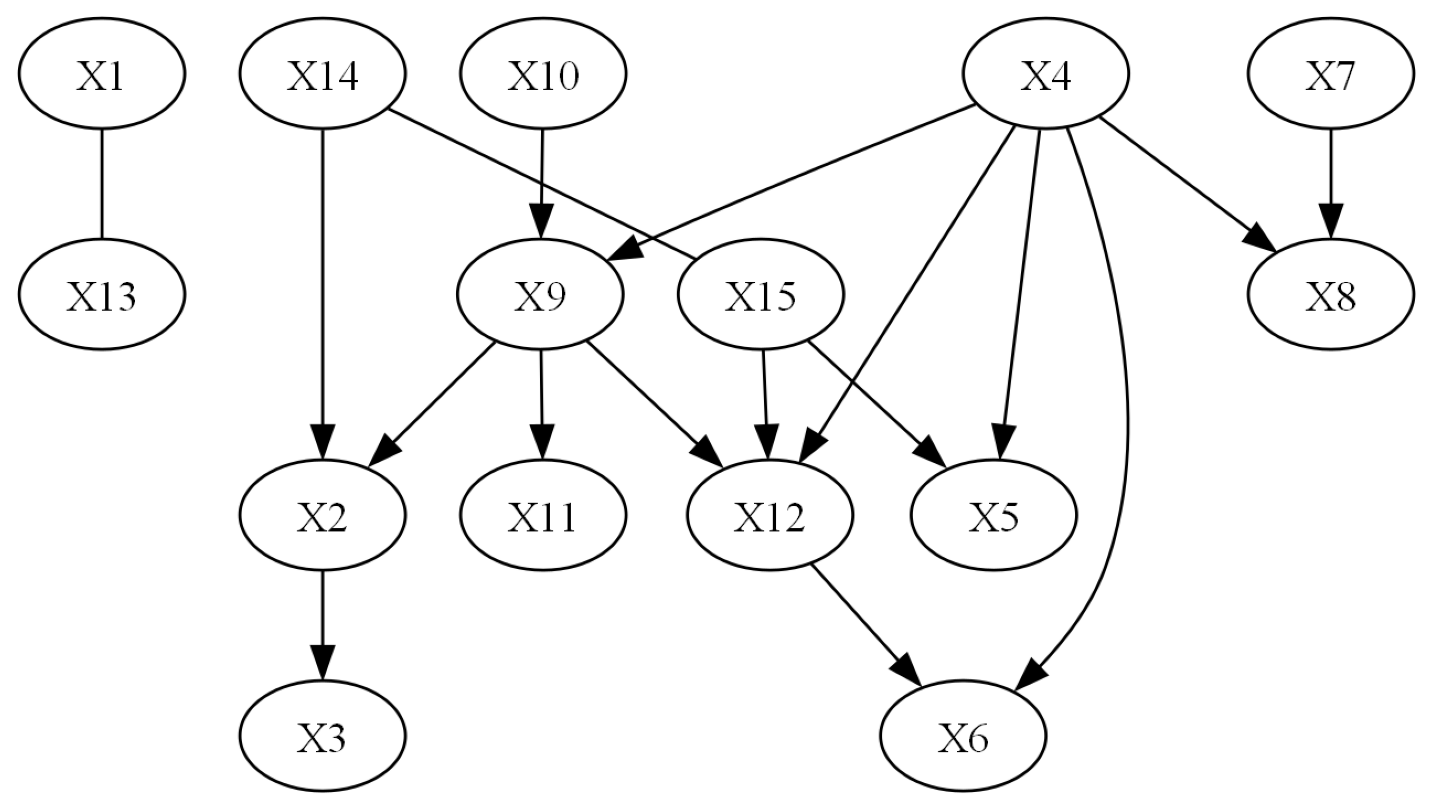

In [212]:
est_graph.draw_pydot_graph()